# Trabajo práctico 1

**Nombre**: Cristina Arroyo Huerta

2.3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [1]:
# %matplotlib
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

def read_original_images(image_name):
    image = cv.imread(image_name)
    return image

In [2]:
def change_to_rgb(image):
    imgRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    return imgRGB

Text(0.5, 1.0, 'segmentacion RGB')

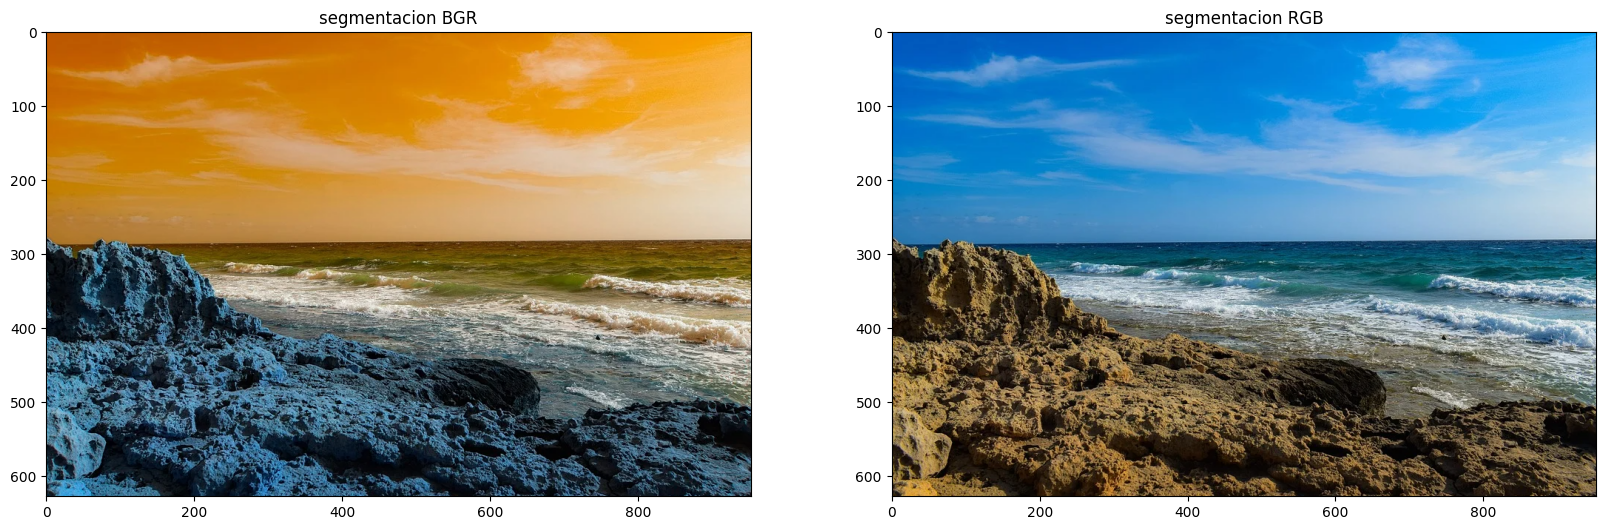

In [3]:
image = read_original_images("segmentacion.png")
imageRGB = change_to_rgb(image)

fig, ax = plt.subplots(1,2, figsize=(20,12))
ax[0].imshow(image)
ax[0].set_title('segmentacion BGR')

ax[1].imshow(imageRGB);
ax[1].set_title('segmentacion RGB')

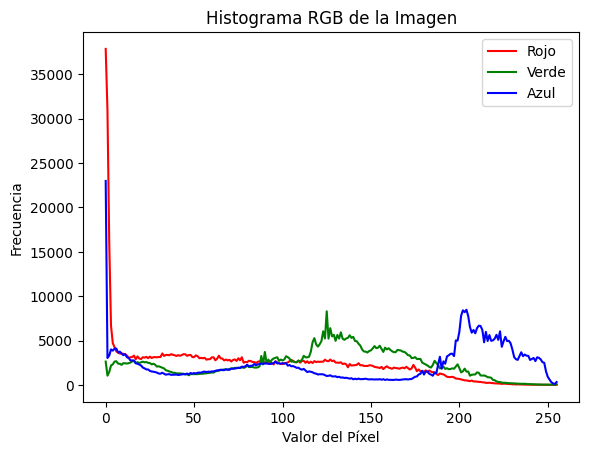

In [4]:
#Histogramas de los tres canales:
hist_red = cv.calcHist([imageRGB], [0], None, [256], [0, 256])
hist_green = cv.calcHist([imageRGB], [1], None, [256], [0, 256])
hist_blue = cv.calcHist([imageRGB], [2], None, [256], [0, 256])

plt.plot(hist_red, color='red', label='Rojo')
plt.plot(hist_green, color='green', label='Verde')
plt.plot(hist_blue, color='blue', label='Azul')

plt.title('Histograma RGB de la Imagen')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Se observa que el color rojo esta un mas apagado que los otros dos, la distribucion mas uniforme la tiene el color verde que es mas elevado en el centro.

Para la segmentacion se deben tomar muestras de cada una de las partes que se quieren segmentar y ademas pasar al espacio HSV

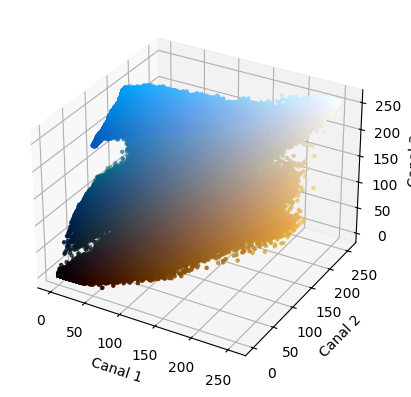

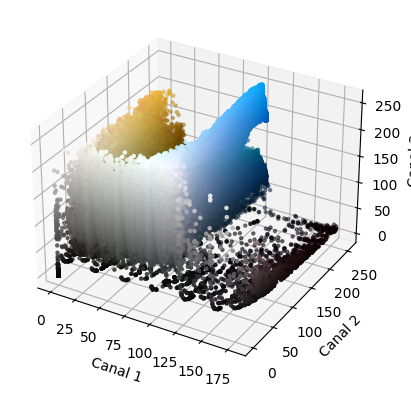

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv.cvtColor(image, cv.COLOR_BGR2HSV)

c1, c2, c3 = cv.split(imageRGB)
ch1, ch2, ch3 = cv.split(img_HSV)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imageRGB.reshape((np.shape(imageRGB)[0]*np.shape(imageRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(ch1.flatten(), ch2.flatten(), ch3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

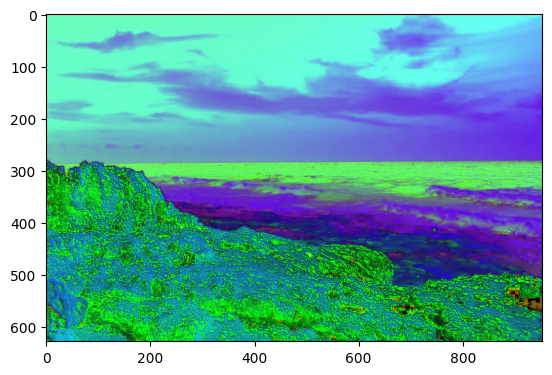

In [6]:
plt.imshow(img_HSV)

(17.56614, 152.17642, 99.65530000000001, 0.0)


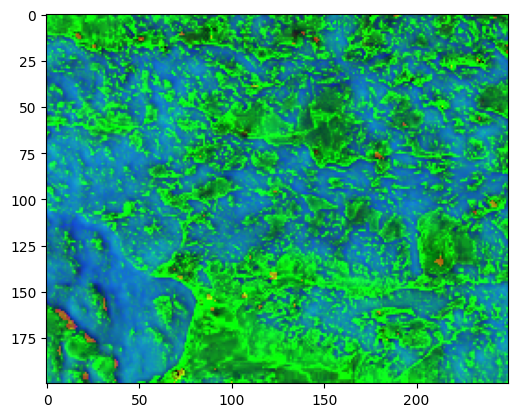

In [7]:
img_muestra_suelo = img_HSV[400:600,0:250,:]
plt.figure(6)
plt.imshow(img_muestra_suelo)

color_mean = cv.mean(img_muestra_suelo)
    
print(color_mean)

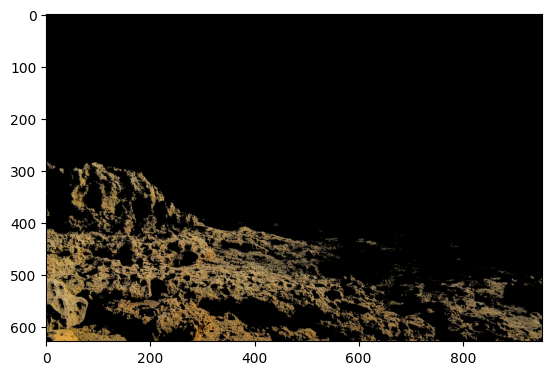

In [8]:
color_l = (14,70,70)
color_u = (24,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imageRGB, imageRGB, mask=mask)

plt.figure(7)
plt.imshow(img_segmentada)
plt.show()

(102.83108079748165, 189.4873284365163, 217.33684784889823, 0.0)


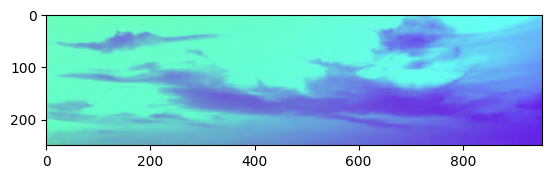

In [9]:
img_muestra_hsv_cielo = img_HSV[0:250,0:1000,:]
plt.figure(11)
plt.imshow(img_muestra_hsv_cielo)

color_mean = cv.mean(img_muestra_hsv_cielo)
    
print(color_mean)

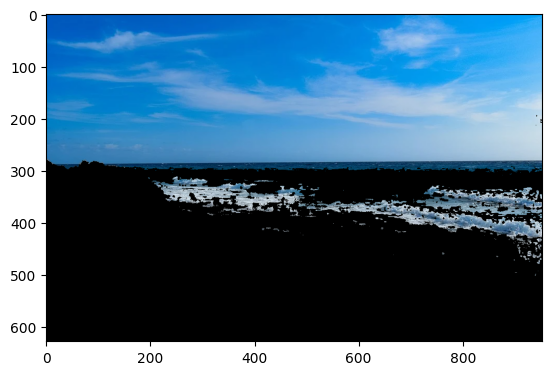

In [10]:
color_l = (100, 20, 40)
color_u = (110, 255, 255)

mask2 = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada2 = cv.bitwise_and(imageRGB, imageRGB, mask=mask2)

plt.figure(8)
plt.imshow(img_segmentada2)
plt.show()

(98.37950495049505, 127.41207920792078, 147.4991419141914, 0.0)


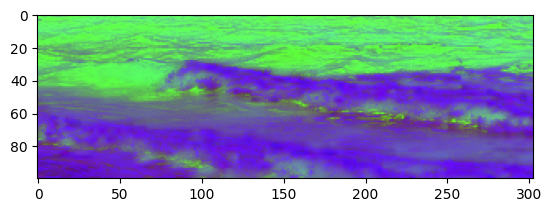

In [11]:
img_muestra_hsv_mar = img_HSV[300:400,650:1000,:]
plt.figure(12)
plt.imshow(img_muestra_hsv_mar)

color_mean = cv.mean(img_muestra_hsv_mar)
    
print(color_mean)

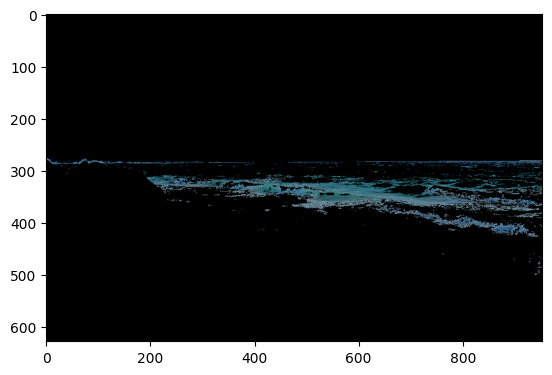

In [12]:
color_l = (90, 50, 80)
color_u = (106, 200, 170)

mask3 = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada3 = cv.bitwise_and(imageRGB, imageRGB, mask=mask3)

plt.figure(13)
plt.imshow(img_segmentada3)
plt.show()